# WideBot-AI-assignment-Task3-Classification

# Data preparation

In [2]:
#imports
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
list_of_files=glob('/kaggle/input/hespress/stories*.csv')

In [4]:
list_of_files

['/kaggle/input/hespress/stories_faits-divers.csv',
 '/kaggle/input/hespress/stories_art-et-culture.csv',
 '/kaggle/input/hespress/stories_regions.csv',
 '/kaggle/input/hespress/stories_sport.csv',
 '/kaggle/input/hespress/stories_medias.csv',
 '/kaggle/input/hespress/stories_economie.csv',
 '/kaggle/input/hespress/stories_tamazight.csv',
 '/kaggle/input/hespress/stories_societe.csv',
 '/kaggle/input/hespress/stories_orbites.csv',
 '/kaggle/input/hespress/stories_politique.csv',
 '/kaggle/input/hespress/stories_marocains-du-monde.csv']

In [5]:
Train_Data=[]
Test_Data=[]
for file_path in list_of_files:
    temp=pd.read_csv(file_path)[['story','topic']].values.tolist()
    Train_Data=Train_Data+temp[:800]
    Test_Data=Test_Data+temp[800:]

Train_Data=np.array(Train_Data)
Test_Data=np.array(Test_Data)

In [6]:
print('train data shape ',np.shape(Train_Data))
print('test data shape ',np.shape(Test_Data))

train data shape  (8800, 2)
test data shape  (2200, 2)


In [8]:
#stopwords
file = open('/kaggle/input/arabic-stop-words/list.txt', 'r', encoding='utf-8') 
stop_words = file.read().splitlines()+["المغرب","المغربية","المغربي"]


In [9]:
#data
x_data=Train_Data[:,0]
y_data=Train_Data[:,1]

In [10]:
np.shape(x_data)

(8800,)

In [11]:
#Feature extraction
vectorizer = TfidfVectorizer(stop_words=stop_words)
Features = vectorizer.fit_transform(x_data)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'آها', 'أب', 'أخ', 'أف', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إليك', 'إليكن', 'إم', 'إيه', 'ات', 'اتان', 'ارتد', 'انفك', 'بخ', 'برح', 'بس', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'ذان', 'سيما', 'شتان', 'صه', 'ظن', 'عد', 'قط', 'كأي', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هاك', 'هب', 'واها', 'وراء'] not in stop_words.
  warnings.warn(


In [12]:
Features.shape

(8800, 176326)

# Model Selection

In [14]:
parameters =  {
    'loss':['hinge', 'log_loss'],
    'penalty':['l2', 'elasticnet'],
    'n_iter_no_change':[5],
    'max_iter':[20],
    'alpha':[1e-4,1e-5,1e-6],
    'random_state':[42],
    'early_stopping':[True]
}
SGDC = SGDClassifier()
clf_sgdc = GridSearchCV(SGDC, parameters)
clf_sgdc.fit(Features, y_data)


GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 1e-05, 1e-06],
                         'early_stopping': [True],
                         'loss': ['hinge', 'log_loss'], 'max_iter': [20],
                         'n_iter_no_change': [5],
                         'penalty': ['l2', 'elasticnet'],
                         'random_state': [42]})

In [15]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",clf_sgdc.best_estimator_)
print("\n The best score across ALL searched params:\n",clf_sgdc.best_score_)
print("\n The best parameters across ALL searched params:\n",clf_sgdc.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 SGDClassifier(alpha=1e-05, early_stopping=True, loss='log_loss', max_iter=20,
              random_state=42)

 The best score across ALL searched params:
 0.8381818181818183

 The best parameters across ALL searched params:
 {'alpha': 1e-05, 'early_stopping': True, 'loss': 'log_loss', 'max_iter': 20, 'n_iter_no_change': 5, 'penalty': 'l2', 'random_state': 42}


# Results

In [16]:
print(classification_report(Test_Data[:,1],clf_sgdc.best_estimator_.predict(vectorizer.transform(Test_Data[:,0]))))

                    precision    recall  f1-score   support

    art-et-culture       0.81      0.93      0.87       200
          economie       0.80      0.85      0.82       200
      faits-divers       0.93      0.95      0.94       200
marocains-du-monde       0.85      0.90      0.87       200
            medias       0.94      0.86      0.90       200
           orbites       0.59      0.56      0.57       200
         politique       0.72      0.82      0.77       200
           regions       0.84      0.80      0.82       200
           societe       0.74      0.60      0.66       200
             sport       0.98      0.96      0.97       200
         tamazight       0.96      0.93      0.95       200

          accuracy                           0.83      2200
         macro avg       0.83      0.83      0.83      2200
      weighted avg       0.83      0.83      0.83      2200



<BarContainer object of 11 artists>

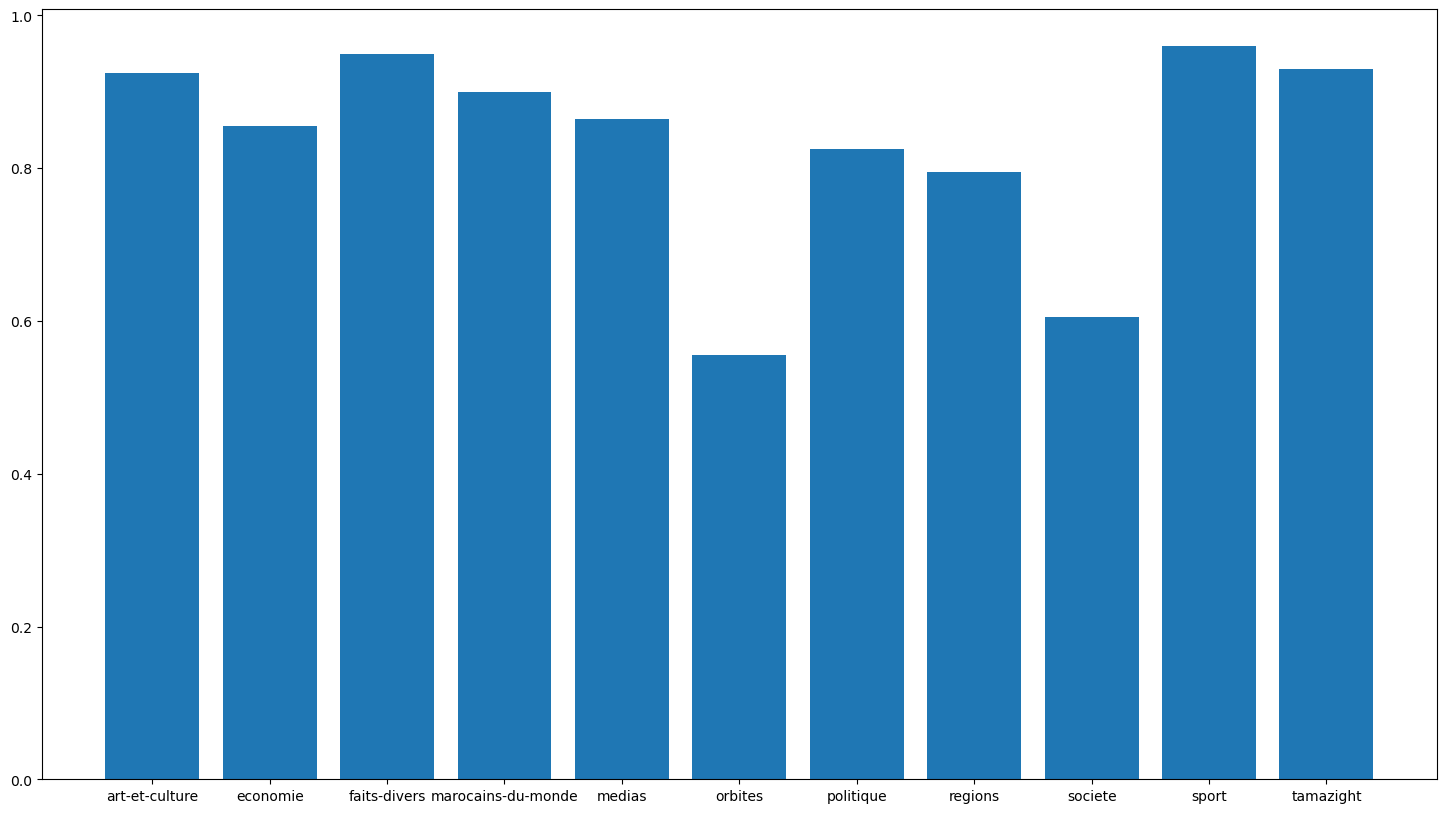

In [20]:
cm = confusion_matrix(Test_Data[:,1],clf_sgdc.best_estimator_.predict(vectorizer.transform(Test_Data[:,0])))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
accuracy=cm.diagonal()
topics=np.unique(Test_Data[:,1])
plt.figure(figsize=(18,10))
plt.bar(topics,accuracy)